# **Project: Amazon Product Recommendation System**

# **Marks: 40**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model. 

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business. 

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:** 
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions. 

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

**Installing surprise library**

## **Importing the necessary libraries and overview of the dataset**

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import mean_absolute_error

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [176]:
# profile path
path = "C:/Users/julia/Downloads/ratings_Electronics(1).csv"
# read csv profile and add columns name 
df1 = pd.read_csv(path, names = ['user_id', 'prod_id', 'rating', 'timestamp'])
# copy df1 to df and drop timestamp
df = df1.copy()
df = df.drop(columns = ['timestamp'])
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [177]:
# check wether this dataset has null values or zero values in ratings
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [178]:
# check wether this dataset has zero values in ratings
df.rating.value_counts()

rating
5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: count, dtype: int64

In [179]:
# check wether there are duplicate data
df.duplicated().sum()

0

#### This original dataset has no missing values,and no duplicate data

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product. 

In [180]:
# find the number of rating for each customers
user_num_rating = df.user_id.value_counts()

In [181]:
# find the customer who give at 50 ratings
cond = user_num_rating >= 50
user_id_50 = user_num_rating.loc[cond].index
# dataset which customers who give at least 50 ratings
df = df[df.user_id.isin(user_id_50)]

In [182]:
# find the product_id which has at least 5 ratings
prod_rating = df.prod_id.value_counts()
prod_5ratings = prod_rating.loc[prod_rating >= 5].index

In [183]:
# find the final dataset which satisfry the requirement
df_final = df.loc[df.prod_id.isin(prod_5ratings)].reset_index(drop = True)

In [184]:
# # Get the column containing the users
# users = df.user_id

# # Create a dictionary from users to their number of ratings
# ratings_count = dict()
# for user in users:

#     # If we already have the user, just add 1 to their rating count
#     if user in ratings_count:        
#         ratings_count[user] += 1
  
#     # Otherwise, set their rating count to 1
#     else:
#         ratings_count[user] = 1

In [185]:
# # We want our users to have at least 50 ratings to be considered
# RATINGS_CUTOFF = 50

# remove_users = []

# for user, num_ratings in ratings_count.items():
#     if num_ratings < RATINGS_CUTOFF:
#         remove_users.append(user)

# df = df.loc[ ~ df.user_id.isin(remove_users)]

In [186]:
# # Get the column containing the products
# prods = df.prod_id

# # Create a dictionary from products to their number of ratings
# ratings_count = dict()

# for prod in prods:
    
#     # If we already have the product, just add 1 to its rating count
#     if prod in ratings_count:
#         ratings_count[prod] += 1
    
#     # Otherwise, set their rating count to 1
#     else:
#         ratings_count[prod] = 1    

In [187]:
# # We want our item to have at least 5 ratings to be considered
# RATINGS_CUTOFF = 5

# remove_users = []

# for user, num_ratings in ratings_count.items():
#     if num_ratings < RATINGS_CUTOFF:
#         remove_users.append(user)

# df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [188]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
0,A3LDPF5FMB782Z,1400501466,5.0
1,A1A5KUIIIHFF4U,1400501466,1.0
2,A2XIOXRRYX0KZY,1400501466,3.0
3,AW3LX47IHPFRL,1400501466,5.0
4,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [189]:
# Check the number of rows and columns and provide observations
df_final.shape

(65290, 3)

**Write your observations here: There are 65290 rows and 3 columns**

### **Data types**

In [190]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65290 entries, 0 to 65289
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


**Write your observations here: There are 3 columns, user_id and prod_id are object type, rating is float type, there are no missing data**

### **Checking for missing values**

In [191]:
# Check for missing values present and provide observations
df_final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [192]:
df_final.rating.value_counts()

rating
5.0    36315
4.0    18127
3.0     6481
2.0     2515
1.0     1852
Name: count, dtype: int64

**Write your observations here: There are no missing data**

### **Summary Statistics**

In [193]:
# Summary statistics of 'rating' variable and provide observations
df_final.rating.describe()

count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

**Write your observations here: The mean of rating is 4.29, median of rating is 5.0, max is also 5.0, mininum is 1.0, and standard deviation is 0.99**

### **Checking the rating distribution**

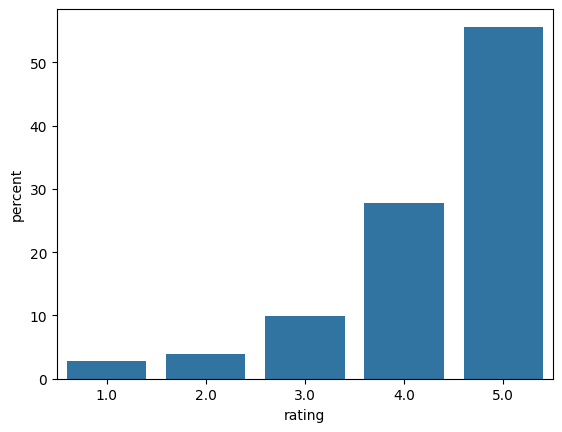

In [194]:
# Create the bar plot and provide observations
sns.countplot(data = df_final, x = 'rating', stat= 'percent')
plt.show()

**Write your observations here: More than 50% of customers (which is the largest part of customers) give 5 score, and then the second largest part is customers who give 4 score, and the least proposition part is custmers who give 1 score**

### **Checking the number of unique users and items in the dataset**

In [195]:
# Number of total rows in the data and number of unique user id and product id in the data
num_user = len(df_final['user_id'].unique())
num_prod = len(df_final['prod_id'].unique())
num_rows = len(df_final)
print(f'The numer of total rows is: {num_rows}, the number of unique user id is {num_user}, the number of unique product id is {num_prod}')

The numer of total rows is: 65290, the number of unique user id is 1540, the number of unique product id is 5689


**Write your observations here: The numer of total rows is: 65290, the number of unique user id is 1540, the number of unique product id is 5689**

### **Users with the most number of ratings**

In [196]:
# Top 10 users based on the number of ratings
df_final['user_id'].value_counts().sort_values(ascending = False)[0:10]

user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A1UQBFCERIP7VJ    193
A22CW0ZHY3NJH8    193
AWPODHOB4GFWL     184
AGVWTYW0ULXHT     179
Name: count, dtype: int64

**Write your observations here: The top 10 users (in the new dataset) are: ADLVFFE4VBT8 (295), A3OXHLG6DIBRW8 (230), A1ODOGXEYECQQ8 (217),A36K2N527TXXJN (212), A25C2M3QF9G7OQ (203), A680RUE1FDO8B (196), A1UQBFCERIP7VJ (193), A22CW0ZHY3NJH8 (193), AWPODHOB4GFWL (184), AGVWTYW0ULXHT     (179)**

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [197]:
# Calculate the average rating for each product 
aver_prod = pd.pivot_table(data= df_final, index= 'prod_id', values= 'rating', aggfunc= 'mean' ).round(2)
aver_prod.columns = ['mean_rating']

# Calculate the count of ratings for each product
cont_prod = pd.pivot_table(data = df_final, index = 'prod_id', values= 'rating', aggfunc= 'count')
cont_prod.columns = ['count_rating']

# Create a dataframe with calculated average and count of ratings
final_rating = pd.merge(left= cont_prod, right = aver_prod, how = 'outer', on = 'prod_id')

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by= 'mean_rating', ascending= False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,count_rating,mean_rating
prod_id,,
B00LGQ6HL8,5,5.0
B001EAQTRI,9,5.0
B001BTG3OQ,7,5.0
B00EKJQLSC,5,5.0
B00EKAPZ8S,8,5.0


In [198]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_prod(data: pd.DataFrame, n, mini_inter):
# Finding products with minimum number of interactions
  data1 = data.loc[data['count_rating']>= mini_inter]
# Sorting values with respect to average rating 
  data2 = data1.sort_values(by = ['mean_rating'], ascending = False)[0:n].index.to_list()
  return data2

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [199]:
top_prod(final_rating, 5, 50)

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

**Top 5 products with 50 minimum interactions based on popularity are : 'B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW'**

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [200]:
top_prod(final_rating, 5, 100)

['B003ES5ZUU', 'B002WE6D44', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE']

**Top 5 products with 100 minimum interactions based on popularity are : 'B003ES5ZUU', 'B002WE6D44', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE'**

We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [201]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them. 

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [202]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions = model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)
    
    print('Precision: ', precision) # Command to print the overall precision
    
    print('Recall: ', recall) # Command to print the overall recall
    
    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [203]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale= (0,5)) 
# Loading the rating dataset
data = Dataset.load_from_df(df_final, reader)
# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size= 0.2, random_state = 1)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [204]:
# Declaring the similarity options
similarity_opt = {'name':'cosine', 'user_based': True}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
user_user = KNNBasic(sim_options= similarity_opt, verbose = False, random_state = 1 )

# Fit the model on the training data
user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(user_user, 10, 3.5)

RMSE: 1.0260
Precision:  0.844
Recall:  0.862
F_1 score:  0.853


**Write your observations here:**
1. RMSE is 1.0260, which is to check how far the overall predicted rating are from the actual ratings
2. Precision is 0.844, which means 84.4% of recommended products in Amazon are relevant
3. Recall is 0.862, which means that 86.2% of relevant products in Amazon are recommended
4. F1 Score is 0.853, which is high, means that the user-user collaborative filtering is pretty good
5. Overall user-user collaborative give customer a good recommendation

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [205]:
# Predicting rating for a sample user with an interacted product
user_user.predict(uid = 'A3LDPF5FMB782Z', iid= '1400501466', r_ui= 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.33   {'actual_k': 6, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.3333333333333335, details={'actual_k': 6, 'was_impossible': False})

**Write your observations here: The estimated rating for product: 1400501466 and user: A3LDPF5FMB782 is 3.33, which is lower than the true rating 5 given by the same user**

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [144]:
# Find unique user_id where prod_id is not equal to "1400501466"

# first find the user who had interacted with '1400501466'
user_list = df_final[df_final['prod_id'] == '1400501466']['user_id'].unique()

# then remove these user_list from the total list of all users
user_unseen_list = df_final[~df_final['user_id'].isin(user_list)]['user_id'].unique()
user_unseen_list

array(['A2ZR3YTMEEIIZ4', 'A3CLWR1UUZT6TG', 'A5JLAU2ARJ0BO', ...,
       'A215WH6RUDUCMP', 'A38C12950IM24P', 'A2J4XMWKR8PPD0'], dtype=object)

In [145]:
len(user_unseen_list)

1534

In [208]:
# check weather user: "A34BZM6S9L7QI4" in this user_unseen_list
"A34BZM6S9L7QI4" in user_unseen_list

True

* It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.** 

In [209]:
# Predicting rating for a sample user with a non interacted product
user_user.predict(uid = 'A34BZM6S9L7QI4', iid ='1400501466', verbose = True )

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 1.99   {'actual_k': 2, 'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=1.991150442477876, details={'actual_k': 2, 'was_impossible': False})

**Write your observations here: The user-user collaborative model prdict that the rating score is 1.99 for product: 1400501466 and user: A34BZM6S9L7QI4**

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [210]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
              'k':[20, 25, 30, 37, 38,39, 41, 42, 40],
              'min_k':[1,3,5,7,9],
              'sim_options':{'name':['cosine', 'msd', 'Pearson'],'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gd = GridSearchCV(algo_class = KNNBasic, param_grid= param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gd.fit(data)
# Best RMSE score
print(gd.best_score)
# Combination of parameters that gave the best RMSE score
print(gd.best_params)

{'rmse': 0.9709179826282536}
{'rmse': {'k': 42, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [211]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options={'name': 'cosine', 'user_based': True}
# Creating an instance of KNNBasic with optimal hyperparameter values
user_user_optimal = KNNBasic(sim_options= sim_options, k = 42, min_k = 5, verbose= False, random_state = 1)
# Training the algorithm on the trainset
user_user_optimal.fit(trainset)
# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(user_user_optimal, k = 10)

RMSE: 0.9740
Precision:  0.836
Recall:  0.895
F_1 score:  0.864


**Write your observations here:** 
1. After Tuning parameters in the model, the root of mean squared error decrease, Precison also decrease a little bit, but recall and f1 score all increase.
2. Overall this optimized user-user collaborative model is better than the original baseline model.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [149]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
user_user_optimal.predict(uid = 'A3LDPF5FMB782Z', iid = '1400501466', verbose= True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 3.33   {'actual_k': 6, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=3.3333333333333335, details={'actual_k': 6, 'was_impossible': False})

In [213]:
# find the true rating for `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"`
cond1 = df_final['user_id'] == "A3LDPF5FMB782Z"
cond2 = df_final['prod_id'] == "1400501466"
df_final[cond1&cond2]

,user_id,prod_id,rating
0,A3LDPF5FMB782Z,1400501466,5.0


In [214]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
user_user_optimal.predict(uid = 'A34BZM6S9L7QI4', iid = '1400501466', verbose= True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.296427477408486, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:** 
1. The estimated rating of `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` is 3.33, which is the same to the score used by original baseline model, and the true rating score is 5.0.
2. The estimated rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model is also 4.30, higher than score by original baseline model.

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `cosine` distance metric.

In [217]:
# 0 is the inner id of the above user
neighbors = user_user_optimal.get_neighbors(0, 5)
#  find the nighbors' internal id of internal id 0
neighbors 

[1, 10, 17, 18, 28]

In [218]:
# find the neighbors' user_id 
df_final.loc[neighbors, 'user_id']

1     A1A5KUIIIHFF4U
10    A341HCMGNZCBIT
17    A1C82BC5GNABOA
18    A1VHCO8RQFIGQJ
28    A3NCIN6TNL0MGA
Name: user_id, dtype: object

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [219]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')
    
    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [220]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommedation = get_recommendations(data = df_final, user_id = 'A3LDPF5FMB782Z', top_n = 5, algo = user_user_optimal)

In [221]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recommendation = pd.DataFrame(recommedation, columns= ['prod_id', 'predicted_ratings'])
recommendation

,prod_id,predicted_ratings
0,B00005LEN4,5
1,B000067RT6,5
2,B0000X0VCY,5
3,B000ENUCR4,5
4,B000TXEE14,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**. 

In [222]:
# Declaring the similarity options
sim_options = {'name' : 'cosine', 'user_based': False}
# KNN algorithm is used to find desired similar items. Use random_state=1
item_item = KNNBasic(sim_options = sim_options, verbose= False, random_state = 1)
# Train the algorithm on the trainset, and predict ratings for the test set
item_item.fit(trainset)
# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(model= item_item, k = 10)

RMSE: 1.0147
Precision:  0.826
Recall:  0.853
F_1 score:  0.839


**Write your observations here:**
1. The root of mean squared error of this item-item is 1.0147
2. The Precision is 0.826, which means that 82.6% of the recommended products are relevant
3. The recall is 0.853, which means that 85.3% of relevant products are recommended.
4. The F1 score is 0.839

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [223]:
# Predicting rating for a sample user with an interacted product
item_item.predict(uid = 'A3LDPF5FMB782Z', iid = '1400501466', verbose= True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.3, details={'actual_k': 20, 'was_impossible': False})

**Write your observations here:**
The rating score(product: 1400501466 and user_id: A3LDPF5FMB782Z) predicted by Item_Item similiarity collaborative is 4.30, the true score is 5.0

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [224]:
# Predicting rating for a sample user with a non interacted product
item_item.predict('A34BZM6S9L7QI4', '1400501466', verbose= True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.0, details={'actual_k': 4, 'was_impossible': False})

**Write your observations here:**
Rating score(user: A34BZM6S9L7QI4, product id: 1400501466) estimated by this item-item collaborative is 4.0

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters 

In [225]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
  'k':[10, 20, 30],
  'min_k':[3, 6, 9], 
  'sim_options':{'name':['msd', 'cosine'], 'user_based':[False]}
              }
# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(algo_class= KNNBasic, param_grid = param_grid, measures= ['rmse'], cv = 3, n_jobs= -1)
# Fitting the data
gs.fit(data)
# Find the best RMSE score
print(gs.best_score)
# Find the combination of parameters that gave the best RMSE score
print(gs.best_params)

{'rmse': 0.9757841429211084}
{'rmse': {'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [226]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd', 'user_based': False}
# Creating an instance of KNNBasic with optimal hyperparameter values
item_item_optimal = KNNBasic(k = 30, min_k= 6, sim_options = sim_options, verbose= False, random_state = 1 )
# Training the algorithm on the trainset
item_item_optimal.fit(trainset)
# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(item_item_optimal, k = 10)

RMSE: 0.9751
Precision:  0.829
Recall:  0.892
F_1 score:  0.859


**Write your observations here:**
1. RMSE is 0.9751
2. Precision is 0.829, which means that 82.9% of recommendations are relevant
3. Recall is 0.892, which mean that 89.2% of relevant products are recommended
4. F1 score is 0.859
5. Compare to the first item-item collaborative, precision, recall and F1 score all increase, and RMSE decrease, which means this optimised model is better than the baseline model. 

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [228]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
item_item_optimal.predict('A3LDPF5FMB782Z', '1400501466', verbose = True )

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.62   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.617647058823531, details={'actual_k': 20, 'was_impossible': False})

In [229]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
item_item_optimal.predict('34BZM6S9L7QI4', '1400501466', verbose = True )

user: 34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.296427477408486, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Write your observations here:**
1. The Estimated score used by this tuned item-item collaborative(for userId:"A34BZM6S9L7QI4",productId: "1400501466") is 4.62, this score is much closer to the true score compare to the original baseline model predict. 
2. The estimated score (userId:"A3LDPF5FMB782Z", productId: "1400501466")is  4.30

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [164]:
# find the neighbors' internal prod id of internal prod id 0
neighbours = item_item_optimal.get_neighbors(0, 5)
neighbours 

[2, 4, 9, 12, 13]

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [232]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations1 = get_recommendations(data = df_final, user_id= 'A1A5KUIIIHFF4U', top_n= 5, algo= item_item_optimal)

In [233]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations1, columns = ['prod_id', 'predicted_ratings']).round(1)

,prod_id,predicted_ratings
0,1400532655,4.3
1,1400599997,4.3
2,9983891212,4.3
3,B00000DM9W,4.3
4,B00000J1V5,4.3


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [234]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)
# Training the algorithm on the trainset
svd.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd, k = 10)

RMSE: 0.9104
Precision:  0.837
Recall:  0.88
F_1 score:  0.858


**Write your observations here:**
1. RMSE is 0.9104, which is smaller compare to user-user collaborative and item-item collaborative model.
2. Precision is 0.837, which means that 83.7% of recommended products are relevant
3. Recall is 0.88, which mean 88% of relevant products are recommended.
4. F1 score is 0.858
5. Overall, SVD is a good model for this data

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [235]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", verbose= True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.09   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.094312160755627, details={'was_impossible': False})

**Write your observations here:**
1. The estimated score for the  `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`by SVD is 4.09, and true score is 5.0

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [236]:
# Making prediction
svd.predict("A34BZM6S9L7QI4","1400501466", verbose= True)

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.05   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.051141373805704, details={'was_impossible': False})

**Write your observations here:**
1. The estimated score for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"` by SVD is 4.05

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [237]:
# Set the parameter space to tune
param_grid = {'n_epochs':np.arange(10, 31, 5), 'lr_all':[0.001, 0.005, 0.01], 'reg_all': np.arange(0.02, 1, 0.2 )}
# Performing 3-fold gridsearch cross-validation
gs1 = GridSearchCV(algo_class= SVD, param_grid = param_grid, measures= ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs1.fit(data)
# Best RMSE score
print(gs1.best_score)
# Combination of parameters that gave the best RMSE score
print(gs1.best_params)

{'rmse': 0.898231745026516}
{'rmse': {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.22}}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [171]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimal = SVD(n_epochs= 20, lr_all= 0.01, reg_all= 0.22, random_state= 1)
# Train the algorithm on the trainset
svd_optimal.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimal, k = 10)

RMSE: 0.9013
Precision:  0.841
Recall:  0.881
F_1 score:  0.861


**Write your observations here:**
1. RMSE decrease compare the original baseline SVD 
2. Precision, Recall and F1 score all increase compare to the baseline SVD model, which mean the tuned SVD is doing a better job compare to the original baselline SVD model.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [239]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_optimal.predict("A3LDPF5FMB782Z", "1400501466", verbose= True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.075625878366929, details={'was_impossible': False})

**Observations:**
1. The estimated score for user: "A3LDPF5FMB782Z" and productId: "1400501466" is 4.08, which is below than the true rating score

In [240]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
svd_optimal.predict("A34BZM6S9L7QI4", "1400501466", verbose= True )

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.07   {'was_impossible': False}


Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.066910356385456, details={'was_impossible': False})

*Observations:**
1. The estimated score for user: "A34BZM6S9L7QI4" and productId: "1400501466" is 4.07.

### **Conclusion and Recommendations**

In [244]:
precision_recall_at_k(user_user_optimal)

RMSE: 0.9740
Precision:  0.836
Recall:  0.895
F_1 score:  0.864


In [245]:
precision_recall_at_k(item_item_optimal)

RMSE: 0.9751
Precision:  0.829
Recall:  0.892
F_1 score:  0.859


In [246]:
precision_recall_at_k(svd_optimal)

RMSE: 0.9013
Precision:  0.841
Recall:  0.881
F_1 score:  0.861


**Write your conclusion and recommendations here**

**Conclusions:**

I used 4 ways to give recommendations:
1. The frist method is to recommend top score products based on average.
2. The second method is user-user similarity collaborative filtering, and tuned user-user collabortaive filtering, the accuracy of the tuned model improve a little bit, F1 score is 0.864. Different user will have different recommendations based on the history of interaction of products and users.
3. The third method is to item-item similarity collaborative filtering, and tuned item-item collaborative filtering, the accuracy of the tuned model also improve a little bit, F1 score is 0.859. Different users also have different recommendations
4. The fourth method is SVD (Singular Value Decompose), which is model based collaborative filtering, the accuracy for tuned SVD model is very high, the root of mean squared error for the tuned svd model is the smallest among all the model I used. 
5. The optimal user-user collaborative filtering has a better performance than optimal item-item collaborative filtering on test dataset.

**Recommendations:**

6. In this amazon dataset, we should use chose recommendation system based on collaborative filtering, not on average. We can choose tuned user-user collaborative filtering or tuned SVD to give user recommendations. 
7. If you care about the frequency of how many recommended product are relevant, you should pick tuned SVD model, which has the higest precision; If you care about the frequency of how many relevant product are recommended, you should pick tuned user-user collaborative filter, which has the higest recall.